In [37]:
#remove '#' and run this cell to install all libraries

#! pip install pandas scikit-learn pgmpy matplotlib networkx


## Dataset Information :
<ul style= "color:#137667;
            font-size:12px;">
    <li> age : age of the patient</li>
    <li> sex : sex of the patient (0 - Male, 1 - Female)</li>
    <li> cp : Chest Pain type</li>
    0: typical angina <br>
    1: atypical angina <br>
    2: non-anginal pain <br>
    3: asymptomatic <br>
    <li> trestbps : resting blood pressure (in mm Hg)</li>
    <li> fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li> chol : cholestoral in mg/dl fetched via BMI sensor</li>
    <li> restecg : resting electrocardiographic results</li>
  0:normal <br>
  1:having ST-T wave abnormality(T wave inversions and/or ST elevation or depression of>0.05 mV) <br>
  2:showing probable or definite left ventricular hypertrophy by Estes' criteria
    <li> thalach : maximum heart rate achieved</li>
    <li> exang : exercise induced angina (1 = yes; 0 = no)</li>
    <li> oldpeak : Previous peak</li>
    <li> slp : ST/HR Slope </li>
    <li> ca : number of major vessels (0-4)</li>
    <li> thall : Thal rate</li>
    <li> target : 0= less chance of heart attack 1= more chance of heart attack</li>
</ul>

In [46]:
# Run this code cell for initial setup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.preprocessing import MinMaxScaler
from pgmpy.models import DiscreteBayesianNetwork as BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [39]:
# load the data to colab
data = pd.read_csv('heart_disease.csv')
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---
---
# Data cleaning 
**1. Check the presence of duplicate values and deal with them.**

In [41]:
# write your code here
data.duplicated().sum()

1

In [42]:
data.drop_duplicates(inplace = True)  # To remove duplicates


---
**2.Check the presence of missing values and deal with them.**

In [43]:
# write your code here
# chol column (continuous numerical)
# thalachh (continuous numerical)
# exng (categorical)
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
#since the no.of missing values are less we drop the rows
data.dropna(inplace=True)
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Min-Max normalize numeric columns


In [45]:
# Identify numeric columns (except 'target' which is label)
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

##  Bayesian Network

In [47]:
# Define Bayesian Network structure
model = BayesianNetwork([
    ('age', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])

# Fit the model using Maximum Likelihood Estimator
model.fit(data, estimator=MaximumLikelihoodEstimator)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'age': 'N', 'sex': 'N', 'cp': 'N', 'trestbps': 'N', 'chol': 'N', 'fbs': 'N', 'restecg': 'N', 'thalach': 'N', 'exang': 'N', 'oldpeak': 'N', 'slope': 'N', 'ca': 'N', 'thal': 'N', 'target': 'N'}


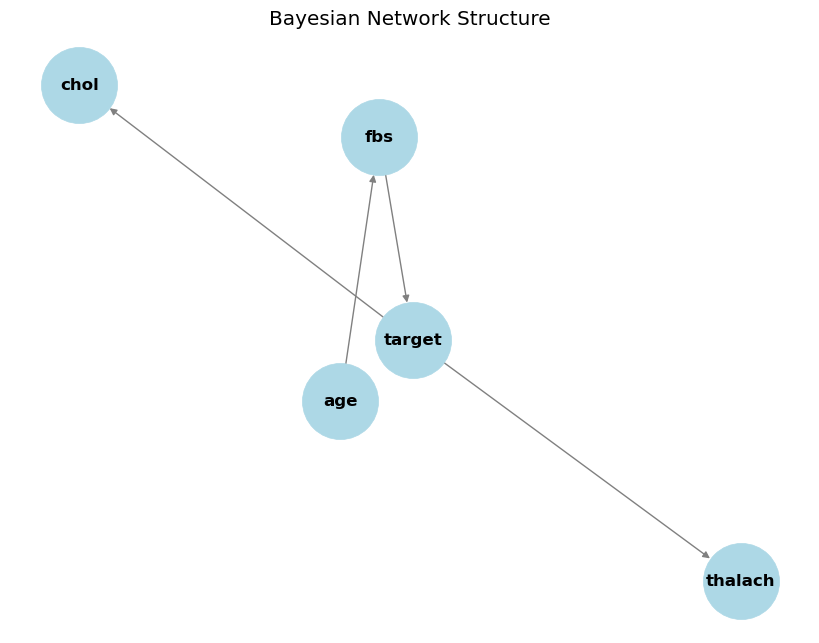

In [49]:
# Visualize the network structure
# Convert pgmpy model to a networkx DiGraph manually
G = nx.DiGraph()
G.add_edges_from(model.edges())

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
        font_size=12, font_weight='bold', edge_color='gray', arrows=True)
plt.title('Bayesian Network Structure')
plt.show()

In [50]:
# Create inference object
infer = VariableElimination(model)

In [52]:
# 1. Probability of heart disease (target=1) given normalized age=0.6
q1 = infer.query(variables=['target'], evidence={'age': 0.6041666666666666})
print("P(target | age=0.6):")
print(q1)

P(target | age=0.6):
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4593 |
+-----------+---------------+
| target(1) |        0.5407 |
+-----------+---------------+


Given a patient with normalized age ≈ 0.6, there's a 54.07% chance they may have heart disease according to your trained Bayesian Network.

In [53]:
# 2. Probability distribution of cholesterol given heart disease present (target=1)
q2 = infer.query(variables=['chol'], evidence={'target': 1})
print("\nP(chol | target=1):")
print(q2)



P(chol | target=1):
+----------------------------+-------------+
| chol                       |   phi(chol) |
+============================+=============+
| chol(0.0)                  |      0.0061 |
+----------------------------+-------------+
| chol(0.011415525114155278) |      0.0000 |
+----------------------------+-------------+
| chol(0.034246575342465724) |      0.0061 |
+----------------------------+-------------+
| chol(0.052511415525114125) |      0.0061 |
+----------------------------+-------------+
| chol(0.07077625570776253)  |      0.0061 |
+----------------------------+-------------+
| chol(0.0776255707762557)   |      0.0061 |
+----------------------------+-------------+
| chol(0.0867579908675799)   |      0.0000 |
+----------------------------+-------------+
| chol(0.091324200913242)    |      0.0000 |
+----------------------------+-------------+
| chol(0.09360730593607308)  |      0.0000 |
+----------------------------+-------------+
| chol(0.0958904109589041)   |    

There's a ~2.44% chance that a person with heart disease has normalized cholesterol ≈ 0.2466



In [54]:
# 3. Probability of heart disease given fasting blood sugar is high (fbs=1)
q3 = infer.query(variables=['target'], evidence={'fbs': 1})
print("\nP(target | fbs=1):")
print(q3)


P(target | fbs=1):
+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4889 |
+-----------+---------------+
| target(1) |        0.5111 |
+-----------+---------------+


Patients with high fasting blood sugar have a slightly higher chance (~51.11%) of developing heart disease, according to your Bayesian model.



## End!